# Concise Implementation of Softmax Regression (Section 4.5)

In the coincise implementation of this section:

- A. Increase the number of epochs for training. Why might the validation accuracy decrease after a while? How could we fix this?
- B. What happens as you increase the learning rate? Compare the loss curves for several learning rates. Which one works better? When?

In [1]:
# !pip install d2l==1.0.3

# d2l importing
from google.colab import drive
drive.mount('/content/gdrive')
import sys
sys.path.append('/content/gdrive/My Drive/Colab Notebooks')

import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

Mounted at /content/gdrive


# What is needed to run the code (all already implemented)

CODE DOES NOT NEED TO BE RUN - STRICTLY FOR RECORD KEEPING

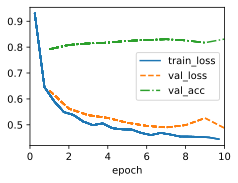

In [ ]:
class SoftmaxRegression(d2l.Classifier):
    """The softmax regression model."""
    def __init__(self, num_outputs, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(),
                                 nn.LazyLinear(num_outputs))

    def forward(self, X):
        return self.net(X)

@d2l.add_to_class(d2l.Classifier)
def loss(self, Y_hat, Y, averaged=True):
    Y_hat = Y_hat.reshape((-1, Y_hat.shape[-1]))
    Y = Y.reshape((-1,))
    return F.cross_entropy(
        Y_hat, Y, reduction='mean' if averaged else 'none')

data = d2l.FashionMNIST(batch_size=256)
model = SoftmaxRegression(num_outputs=10, lr=0.1)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)


# A. Increase the number of epochs for training. Why might the validation accuracy decrease after a while? How could we fix this?

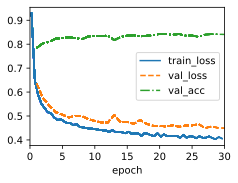

In [6]:
acc = []
epochs = [30] # epochs = [10, 20, 30, 40] multiple epochs can also be test

data = d2l.FashionMNIST(batch_size=256)
model = d2l.SoftmaxRegression(num_outputs=10, lr=0.1) # need to add the d2l package name


for e in epochs:
  trainer = d2l.Trainer(max_epochs=e)
  trainer.fit(model, data)

  val_acc= model.board.data['val_acc']
  acc.append(val_acc)


The results from the previous code utilizing 30 epochs demonstrates how the validation_acc decreases over the number of epochs. A number of reasons could contribute to this effect including overfitting and learning rate decay, where the learnign rate is too high and overshooting the optimal strategy.

Some strategies to mitigate this effect are through utilizing dropout to regularize the model, employing early stopping,and modifying the learning rate as the program progress could all help mitigate this effect.

# B. What happens as you increase the learning rate? Compare the loss curves for several learning rates. Which one works better? When?

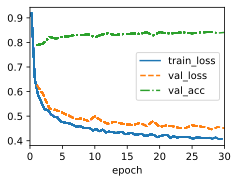

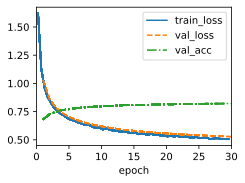

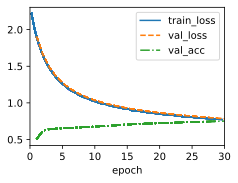

In [7]:
# Setting epoch size to 25 and testing different learning rates effect
acc = []

data = d2l.FashionMNIST(batch_size=256)

learningRates = [0.1, 0.01, 0.001]

for lr in learningRates:
  model = d2l.SoftmaxRegression(num_outputs=10, lr=lr) # need to add the d2l package name
  trainer = d2l.Trainer(max_epochs=30)
  trainer.fit(model, data)